<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 10</h2>
<h3 align='center'>April 17, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Introduction
In this assignment, we continue our analysis of signals using Fourier Transforms. This time, we focus on finding transforms of functions which are discontinuous when periodically extended. An example of this is $\sin(\sqrt{2} t)$. The discontiuity causes fourier components in frequencies other than the sinusoids frequency which decay as $\frac{1}{\omega}$, due to Gibbs phenomenon. We resolve this problem using the process of windowing. In this assignment, we focus on one particular type of window - the Hamming window. We use this windowed transform to analyse signals known to contain a sinusoid of unknown frequencies and extract its phase and frequency. We then perform a sliding DFT on a chirped signal and plot a spectrogram or a time-frequency plot.

In [1]:
%%capture
# Importing numpy and matplotlib
from pylab import *
from IPython.display import *

In [2]:
rcParams['figure.figsize'] = 18,6
rcParams['font.size'] = 18
rcParams['text.usetex'] = True
import writefile_run

In [3]:
%%capture
%%writefile_run ee16b033_10.py -dr

import sys
import argparse
from pylab import *
from IPython.display import *
rcParams['figure.figsize'] = 18,6
rcParams['font.size'] = 18
rcParams['text.usetex'] = True

"""
Get command line arguments and assign them to variables automatically.
"""

ARGS = {}

def addargs(args,parser):
    for arg in args:
        parser.add_argument('-{}'.format(arg),default=args[arg],type=type(args[arg]))
        
ap = argparse.ArgumentParser()
addargs(ARGS,ap)
args = ap.parse_args()

for arg in ARGS:
    exec("{} = args.{}".format(arg,arg))
    

# Worked examples
The examples given are worked through below:

## Spectrum of $\sin(\sqrt{2}t)$

The spectrum of $\sin(\sqrt{2}t)$ is plotted below:

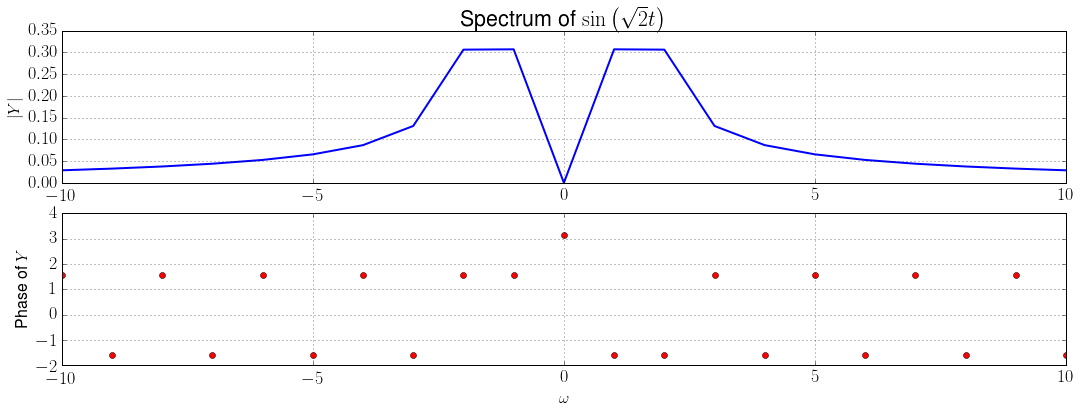

In [4]:
%%writefile_run ee16b033_10.py -a


t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=sin(sqrt(2)*t)
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

This is the function for which we want to find the DFT:

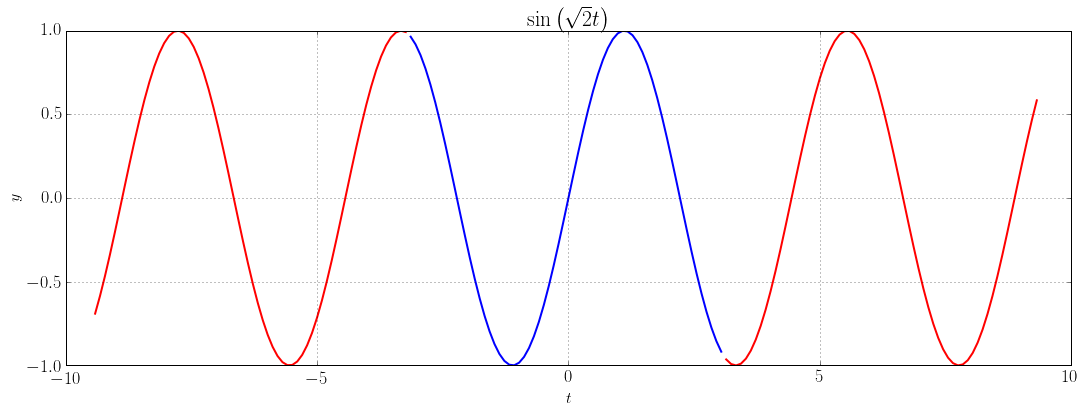

In [5]:
%%writefile_run ee16b033_10.py -a


t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
# y=sin(sqrt(2)*t)
figure(2)
plot(t1,sin(sqrt(2)*t1),"b",lw=2)
plot(t2,sin(sqrt(2)*t2),"r",lw=2)
plot(t3,sin(sqrt(2)*t3),"r",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
show()

However, when we calculate the DFT by sampling over a finite time window, we end up calculating the DFT of the following periodic signal:

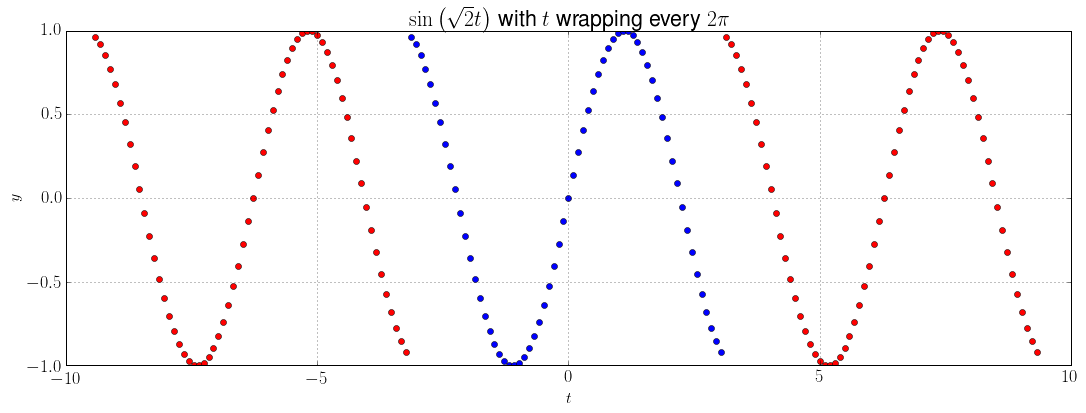

In [6]:
%%writefile_run ee16b033_10.py -a


t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
y=sin(sqrt(2)*t1)
figure(3)
plot(t1,y,"bo",lw=2)
plot(t2,y,"ro",lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

This results in discontinuites in the signal. These discontinuities lead to spectral components which decay as $\frac{1}{\omega}$. To confirm this, we plot the spectrum of the periodic ramp below:

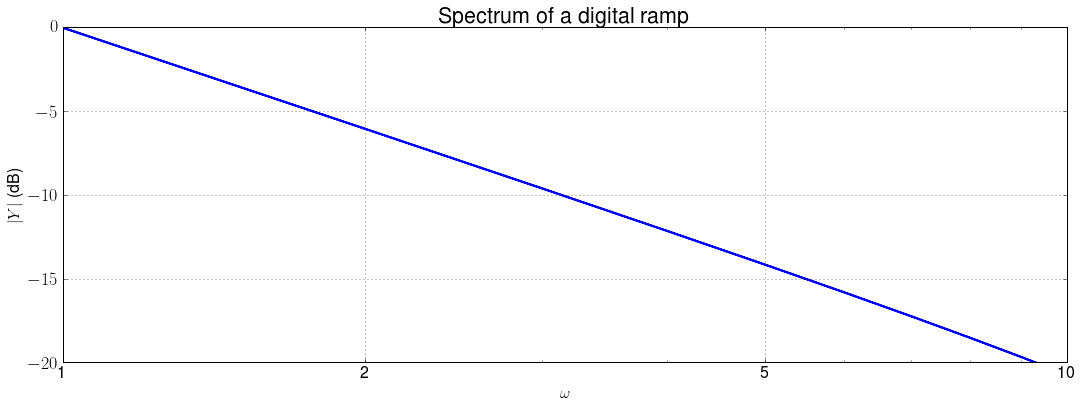

In [7]:
%%writefile_run ee16b033_10.py -a


t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=t
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
xticks([1,2,5,10],["1","2","5","10"],size=16)
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
show()

## The Hamming window

We resolve the problem of discontinuities by attenuating the signal near the endpoints of our time window, to reduce the discontinuities caused by periodically extending the signal. This is done by multiplying by a so called windowing function. In this assignment we use the Hamming window of size $N$:

$$x[n] =  0.54+0.46 \cos \left( 2\pi \frac{n}{N-1} \right)$$

In [8]:
%%writefile_run ee16b033_10.py -a


def hamming(n):
    n = array(n)
    N = n.shape[0]
    return 0.54+0.46*cos(2*pi*n/(N-1))

We plot it below for $N = 64$

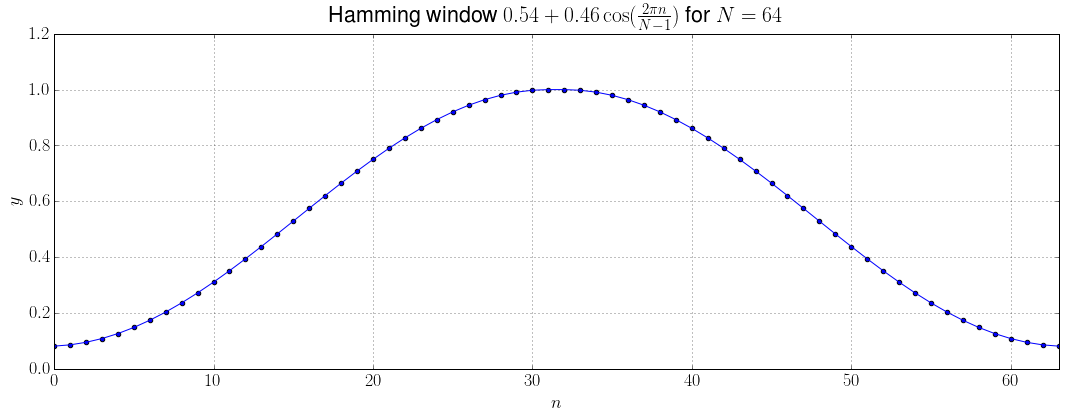

In [9]:
%%writefile_run ee16b033_10.py -a


n = arange(64)
plot(n,fftshift(hamming(n)))
scatter(n,fftshift(hamming(n)))
grid()
xlim(0,63)
ylabel("$y$")
xlabel("$n$")
title(r"Hamming window $0.54+0.46\cos(\frac{2\pi n}{N-1})$ for $N = 64$")
show()

## Spectrum after windowing

We now multiply our signal with the Hamming window and then periodically extend it:

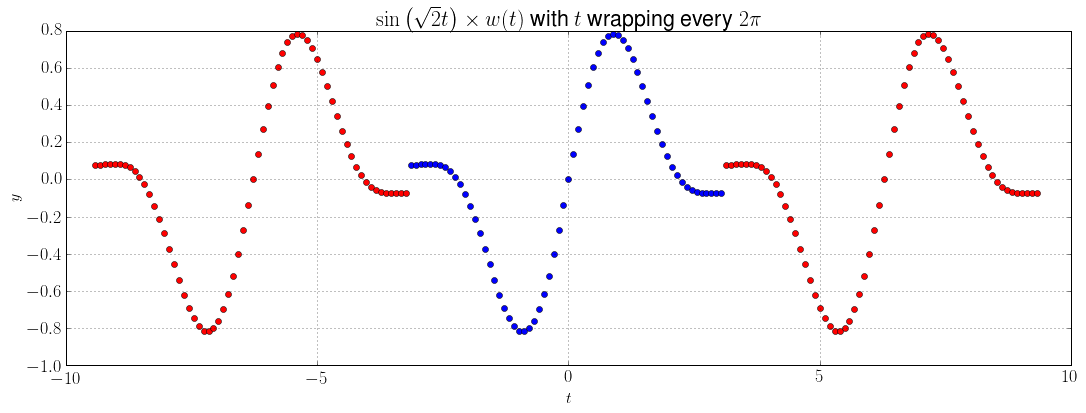

In [10]:
%%writefile_run ee16b033_10.py -a



t1=linspace(-pi,pi,65);t1=t1[:-1]

t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t1)*wnd
figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

The spectrum is found below using a window size of $2 \pi$:

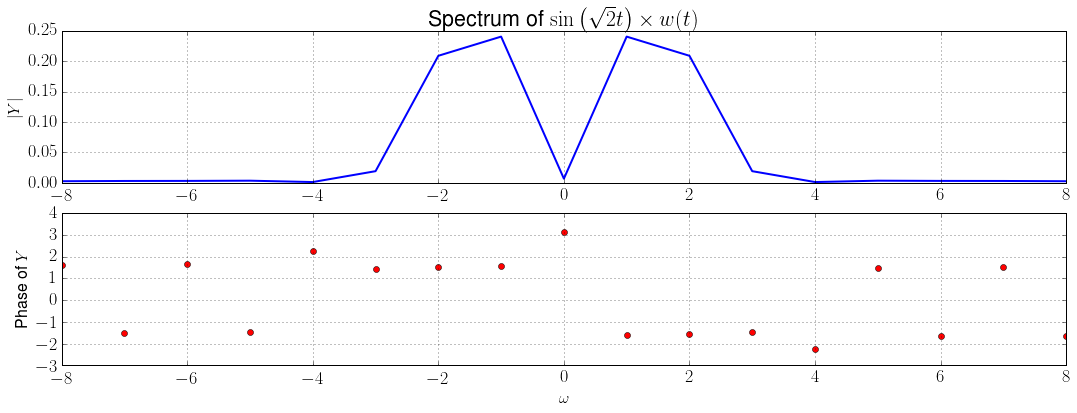

In [11]:
%%writefile_run ee16b033_10.py -a


t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t)*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-8,8])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-8,8])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

And with a window size of $8 \pi$

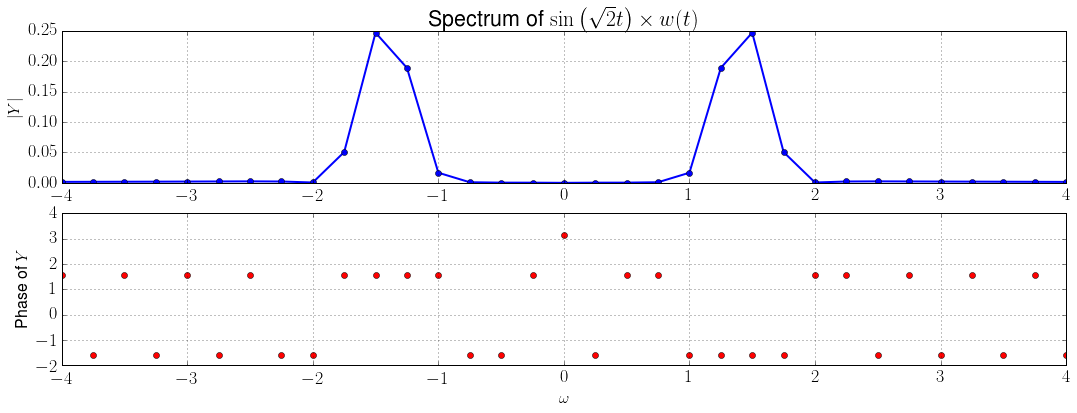

In [12]:
%%writefile_run ee16b033_10.py -a


t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(256)
wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
y=sin(sqrt(2)*t)
# y=sin(1.25*t)
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),"b",w,abs(Y),"bo",lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
12
xlabel(r"$\omega$",size=16)
grid(True)
show()

We observe that the spectrum has much more components with a magnitude of zero. However, the peak at the frequency of $\sqrt{2}$ has been broadened due to spectral leakage.

# FFT with hamming window

## The function

We first write a general function to find the windowed FFT of a given input signal:

In [13]:
%%writefile_run ee16b033_10.py -a


def plotFFT(func,t_range=(0,2*pi),points=128,tol=1e-5,
            func_name=None,unwrap_=True,wlim=(-10,10),scatter_size=40,
           iff=False, plot=True, window=False):
    """Plot the FFT of the given continuous function.
    
    func : the continuous function
    t_range : the time range over which to sample the function,
        exclusive of the last value
    points : number of samples
    tol : tolerance for setting phase to 0 when magnitude is low
    func_name : name of the function
    unwrap : whether to unwrap phase
    wlim : range of frequencies for the plots, give None for all frequencies
    scatter_size : size of scatter plot points
    iff: whether to do an ifftshift on the time range
    
    Returns:
    numpy array containing the FFT, after being shifted and normalized.
    """
    
    # default name for function
    if func_name == None:
        func_name = func.__name__
    
    # time points to sample
    t = linspace(*t_range,points+1)[:-1]
    T = t_range[1]-t_range[0]
    samplingfreq = points/T
    
    if iff:
        t = ifftshift(t)
    
    # corresponding frequencies of the sampled signal
    w = linspace(-pi,pi,points+1)[:-1]
    w = w*samplingfreq
    
    # find fft
    y = func(t)
    if window:
        wnd = fftshift(hamming(arange(points)))
        y = y*wnd
    Y =  fftshift( fft(y))/points
    
    if not plot:return w,Y
    # get phase
    ph = angle(Y)
    if unwrap_:
        ph = unwrap(ph)
    
    # get mag
    mag = abs(Y)
    
    # clean up phase where mag is sufficiently close to 0
    ph[where(mag<tol)]=0
    
    # plot 
    fig,axes = subplots(1,2)
    ax1,ax2 = axes
    
    # magnitude
    ax1.set_title("Magnitude of DFT of {}".format(func_name))
    ax1.set_xlabel("Frequency in rad/s")
    ax1.set_ylabel("Magnitude")
    ax1.plot(w,mag,color='red')
    ax1.scatter(w,mag,color='red',s=scatter_size)
    ax1.set_xlim(wlim)
    ax1.grid()
    
    # phase
    ax2.set_title("Phase of DFT of {}".format(func_name))
    ax2.set_xlabel("Frequency in rad/s")
    ax2.set_ylabel("Phase in rad")
    ax2.plot(w,ph,color='green')
    ax2.scatter(w,ph,color='green',s=scatter_size)
    ax2.set_xlim(wlim)
    ax2.grid()
    
    show()
    return w,Y

## FFT of $\cos^3(0.86t)$

We first find the FFT without the Hamming window:

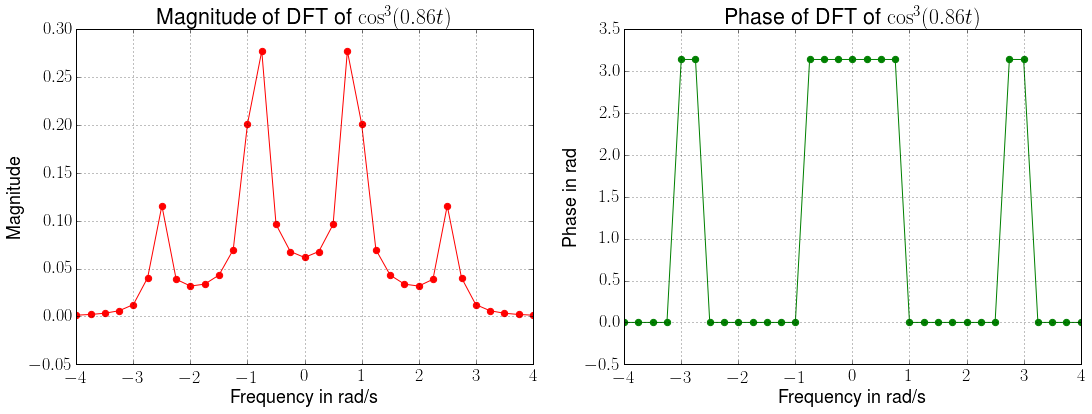

In [14]:
%%writefile_run ee16b033_10.py -a


w,Y = plotFFT(lambda x: cos(0.86*x)**3, points = 2048, t_range=(-4*pi,4*pi), 
              wlim=(-4,4),tol=1e-2, window=False,func_name=r"$\cos^3(0.86t)$",unwrap_=False)

We repeat the process, but with Hamming window:

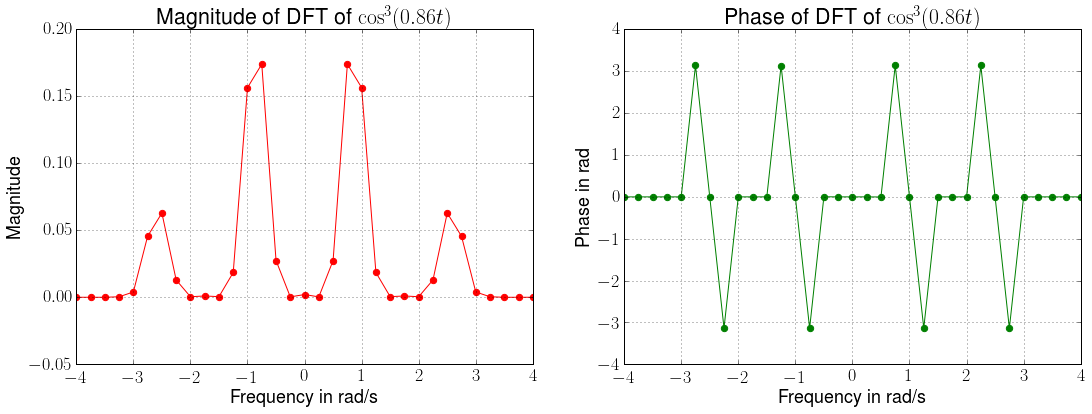

In [15]:
%%writefile_run ee16b033_10.py -a


w,Y = plotFFT(lambda x: cos(0.86*(x))**3, points = 2048, t_range=(-4*pi,4*pi), 
              wlim=(-4,4),tol=1e-2, window=True,func_name=r"$\cos^3(0.86t)$",unwrap_=False)

In [16]:
%%writefile_run ee16b033_10.py -a


mag = abs(Y)
l = 5 # must be odd
index = argmax(mag)
ind = index-int((l-1)/2)+ arange(l)
fs = w[ind]
points = mag[index-int((l-1)/2):index+int((l+1)/2)]
freq = np.sum(points*fs)/np.sum(points)
print("Estimated first peak frequency: {:.4f}".format(abs(freq)))

Estimated first peak frequency: 0.8597


* We observe that in the case without a Hamming window, a lot of energy in the spectrum was in frequencies other than those of the signal. This is because of the Gibbs phenomenon.
* We observe that the windowed transform is much better in terms of the magnitude spectrum. Only components near the frequencies of the input signal are present, while others are mostly 0. The reason that some frequencies near the actual peak are present is because multiplying by a window in the time domain corresponds to a convolution in the frequency domain with its fourier transform. This means that the delta functions in the frequency domain are smeared out by the spectrum of the Hamming window.

# Estimating $\omega$ and $\delta$

The task is to estimate the values of $\omega$ and $\delta$ given 128 samples of $\cos (\omega t + \delta)$ for $(-\pi, -\pi)$.

## Estimator 1

The first approach is to take the windowed and non-windowed DFT of the 128 samples. We then find a weighted average of frequencies weighted by the magnitude of the DFT to obtain the peak frequency $\omega$. To find $\delta$, phase values around the peak frequency are averaged. 

In [17]:
%%writefile_run ee16b033_10.py -a



def estimateWD1(vec,l=6,window=True):
    """Estimate the value of omega and delta assuming vec contains
    128 samples of cos(omega*t + delta) in (-pi,pi). Uses the magnitude
    and phase spectra to estimate omega and delta respectively."""
    
    N = 128
    delta_t = 2*pi/N
    w_max = pi/delta_t
    delta_w = 2*w_max/N
    
    w = linspace(-w_max,w_max,N+1)[:-1]
    
    if window:
        vec_ = vec*fftshift(hamming(arange(N)))
    else:
        vec_ = vec
        
    y = fft(fftshift(vec_))/N
    mag = abs(y)
    
    points = mag[:l]
    ind = arange(l)
    omega = np.sum(points*ind)/np.sum(points)
    start=0
    if omega>1:
        start=1
    delta = mean(angle(y)[start:3])
    return omega,delta

A function to test a general estimator is written below:

In [18]:
%%writefile_run ee16b033_10.py -a



def testEstimator(est,trials=100,noise = False):
    """Test an estimator of omega and delta."""
    t = linspace(-pi,pi,128+1)[:-1]

    oms=[]
    ompreds=[]
    
    dels = []
    delpreds = []

    for i in range(int(trials)):
        omega = 0.5+rand()
        oms.append(omega)
        delta = pi*(rand()-0.5)
        dels.append(delta)
        
        v = cos(omega*t+delta)
        if noise:
            v += 0.1*randn(128)
        om, de = est(v)
        
        ompreds.append(om)
        delpreds.append(de)
        
    oms = array(oms)
    dels = array(dels)
    ompreds = array(ompreds)
    delpreds = array(delpreds)
    omerr = mean(abs(oms-ompreds))
    delerr = mean(abs(dels-delpreds))
    print("MAE for omega: {:.4f}\tMAE for delta: {:.4f}".format(omerr,delerr))
    return omerr,delerr

We test the first estimator for $1000$ trials with random $\omega$ and $\delta$. We then report the mean absolute error. We iterate over different averaging window sizes $k$, to find the window with the least error.

In [19]:
%%writefile_run ee16b033_10.py -a


print("Mean absolute errors for different window sizes:")
print("Estimator 1 without noise:")
for k in 1+arange(10):
    print("k={}".format(k),end='\t')
    testEstimator(lambda v:estimateWD1(v,l=k),trials=1e3, noise=False)

Mean absolute errors for different window sizes:
Estimator 1 without noise:
k=1	MAE for omega: 0.9815	MAE for delta: 0.2814
k=2	MAE for omega: 0.3537	MAE for delta: 0.2744
k=3	MAE for omega: 0.1263	MAE for delta: 0.1209
k=4	MAE for omega: 0.1101	MAE for delta: 0.1095
k=5	MAE for omega: 0.1173	MAE for delta: 0.1126
k=6	MAE for omega: 0.1162	MAE for delta: 0.1081
k=7	MAE for omega: 0.1220	MAE for delta: 0.1010
k=8	MAE for omega: 0.1287	MAE for delta: 0.0937
k=9	MAE for omega: 0.1457	MAE for delta: 0.0974
k=10	MAE for omega: 0.1539	MAE for delta: 0.0921


In [20]:
%%writefile_run ee16b033_10.py -a


print("Mean absolute errors for different window sizes:")
print("Estimator 1 with noise:")
for k in 1+arange(10):
    print("k={}".format(k),end='\t')
    testEstimator(lambda v:estimateWD1(v,l=k),trials=1e3, noise=True)

Mean absolute errors for different window sizes:
Estimator 1 with noise:
k=1	MAE for omega: 1.0072	MAE for delta: 0.2706
k=2	MAE for omega: 0.3392	MAE for delta: 0.2818
k=3	MAE for omega: 0.1227	MAE for delta: 0.1305
k=4	MAE for omega: 0.1143	MAE for delta: 0.1193
k=5	MAE for omega: 0.1092	MAE for delta: 0.1042
k=6	MAE for omega: 0.1132	MAE for delta: 0.0921
k=7	MAE for omega: 0.1421	MAE for delta: 0.0821
k=8	MAE for omega: 0.1789	MAE for delta: 0.0703
k=9	MAE for omega: 0.2548	MAE for delta: 0.0609
k=10	MAE for omega: 0.3170	MAE for delta: 0.0512


It is clear from the above results that a value of k around $4$ or $5$ works best. The estimator is not vastly affected by the noise added. This is because the noise mainly contains very high frequency components, which will not affect the low frequency parts of the spectrum. We try another approach to estimate delta below:

## Estimator 2

Using the value of $omega$ estimated by weighted averaging (say $\omega'$), we then fit a model using least squares and estimate $\delta$. In particular, we fit the 128 unwindowed samples to the model:

$$x(t) = A \cos (\omega' t) + B sin(\omega' t)$$

We can then estimate the phase $\delta$ as follows:

$$\delta = - \tan^{-1} \left( \frac{B}{A} \right)$$

The estimator is written below:

In [21]:
%%writefile_run ee16b033_10.py -a



def estimateWD2(vec,l=6,window=True):
    """Estimate the value of omega and delta assuming vec contains
    128 samples of cos(omega*t + delta) in (-pi,pi)."""
    
    N = 128
    delta_t = 2*pi/N
    w_max = pi/delta_t
    delta_w = 2*w_max/N
    
    w = linspace(-w_max,w_max,N+1)[:-1]
    
    if window:
        vec_ = vec*fftshift(hamming(arange(N)))
    else:
        vec_ = vec
        
    y = fft(vec_)/N
    mag = abs(y)
    
    points = mag[:l]
    ind = arange(l)
    omega = np.sum(points*ind)/np.sum(points)
    
    
    t = linspace(-pi,pi,N+1)[:-1]
    A = vstack((cos(omega*t),sin(omega*t))).T
    #print(vec.shape)
    a,b = lstsq(A,vec)[0]
    delta = -arctan(b/a)
    
    return omega,delta

We test it with varying weighted averging windows again:

In [22]:
%%writefile_run ee16b033_10.py -a


print("Estimator 2 without noise:")
for k in 1+arange(10):
    print("k={}".format(k),end='\t')
    testEstimator(lambda v:estimateWD2(v,l=k),trials=1e3, noise=False)

Estimator 2 without noise:
k=1	MAE for omega: 1.0086	MAE for delta: 0.7789
k=2	MAE for omega: 0.3435	MAE for delta: 0.1186
k=3	MAE for omega: 0.1260	MAE for delta: 0.0332
k=4	MAE for omega: 0.1155	MAE for delta: 0.0322
k=5	MAE for omega: 0.1141	MAE for delta: 0.0220
k=6	MAE for omega: 0.1140	MAE for delta: 0.0268
k=7	MAE for omega: 0.1185	MAE for delta: 0.0316
k=8	MAE for omega: 0.1363	MAE for delta: 0.0417
k=9	MAE for omega: 0.1415	MAE for delta: 0.0356
k=10	MAE for omega: 0.1494	MAE for delta: 0.0353


In [23]:
%%writefile_run ee16b033_10.py -a


print("Estimator 2 with noise:")
for k in 1+arange(10):
    print("k={}".format(k),end='\t')
    testEstimator(lambda v:estimateWD2(v,l=k),trials=1e3, noise=True)

Estimator 2 with noise:
k=1	MAE for omega: 1.0077	MAE for delta: 0.7626
k=2	MAE for omega: 0.3589	MAE for delta: 0.1351
k=3	MAE for omega: 0.1226	MAE for delta: 0.0406
k=4	MAE for omega: 0.1148	MAE for delta: 0.0359
k=5	MAE for omega: 0.1136	MAE for delta: 0.0488
k=6	MAE for omega: 0.1223	MAE for delta: 0.0538
k=7	MAE for omega: 0.1339	MAE for delta: 0.0345
k=8	MAE for omega: 0.1796	MAE for delta: 0.0527
k=9	MAE for omega: 0.2369	MAE for delta: 0.0725
k=10	MAE for omega: 0.3129	MAE for delta: 0.1288


We again observe that a value of $4$ or $5$ is best suited for the weighted averaging window size. We also observe that the error in estimating $\delta$ using the least squares approach is much less than using the phase of the DFT. The effect of noise is similar as in the first case. However, we must remember that the least squares approach is more computationally expensive compared to computing just one DFT.

# Spectrogram analysis of a chirp

We now analyse the frequency spectrum of a particular signal called a chirp.

## The chirp signal

The chirp signal is a sinusoid whose frequency varies linearly with time. In this assignment, we look at the following chirp:

$$\cos \left(16t\left(1.5 + \frac{t}{2 \pi}\right)\right)$$

In [24]:
%%writefile_run ee16b033_10.py -a


def chirp(t):
    return cos(16*t*(1.5 + t/(2*pi)))

The chirp is plotted below:

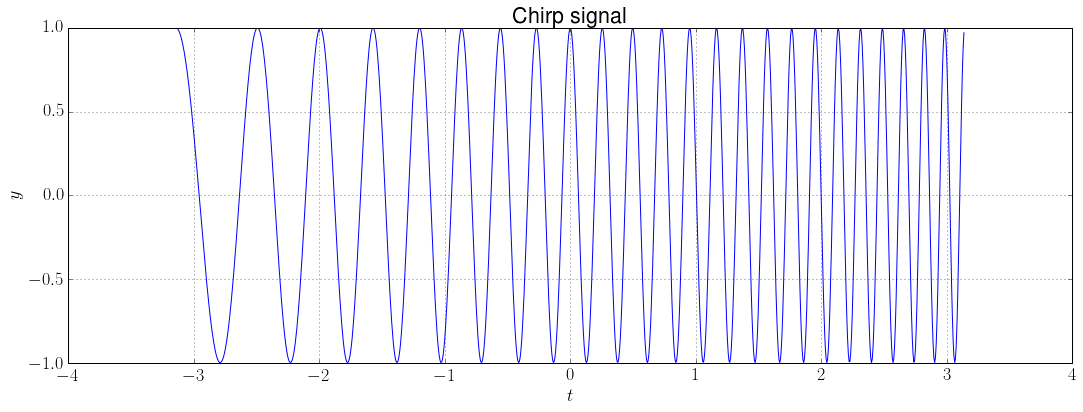

In [25]:
%%writefile_run ee16b033_10.py -a


t = linspace(-pi,pi,1024+1)[:-1]
plot(t,chirp(t))
#scatter(t,chirp(t))
title("Chirp signal")
xlabel("$t$")
ylabel("$y$")
grid()
show()

## FFT of the chirp

We find the FFT of the chirp without windowing:

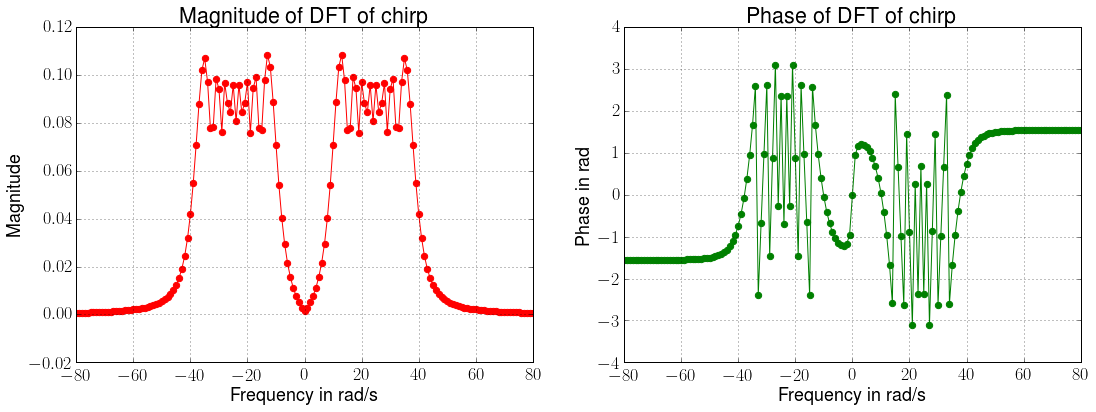

In [26]:
%%writefile_run ee16b033_10.py -a


w,y = plotFFT(chirp, t_range=(-pi,pi), points=1024, wlim=(-80,80), unwrap_=False, plot=True,window=False)

We observe that various frequencies in the range of 5-50 rad/s are present in the spectrum. This is because of the $1/\omega$ decay of the Gibbs phenomenon. Let us window the chirp and observe the differences: 

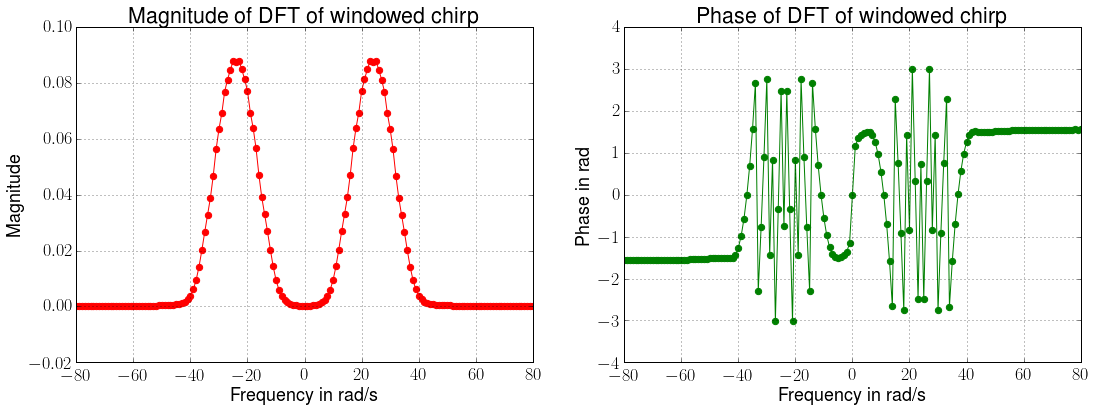

In [27]:
%%writefile_run ee16b033_10.py -a


w,y = plotFFT(chirp, t_range=(-pi,pi), points=1024, wlim=(-80,80), unwrap_=False, plot=True,window=True,
             func_name="windowed chirp")

We now observe that the frequencies are more confined to the range between 16 and 32, as expected. The extra components due to the discontinuity have been suppressed.

## FFT over multiple windows

To obtain a better picture of what is going in the chirp signal, we take the DFT of a small window of samples around each time instant, and plot a 2D surface of the resulting spectra vs time. We initially find the DFTs without using a Hamming window:

In [28]:
%%writefile_run ee16b033_10.py -a


N = 1024
window = 64
n_wins = int(N/window)
delta_t = 2*pi/N
w_max = pi/delta_t
delta_w = 2*w_max/N
    
t = linspace(-pi,pi,N+1)[:-1]
y = chirp(t)

ys=[]
T=26
for i in arange(0,N-window):
    y_ = y[i:i+window]
    Y = 1/window * fftshift(fft(y_))
    ys.append(Y[T:-T])
    
t = linspace(-pi,pi,N)[int(window/2):-int(window/2)]
w = linspace(-w_max,w_max,window+1)[:-1][T:-T]
tt,ww = meshgrid(t,w)
ys = array(ys)

We get the following spectrogram plots:

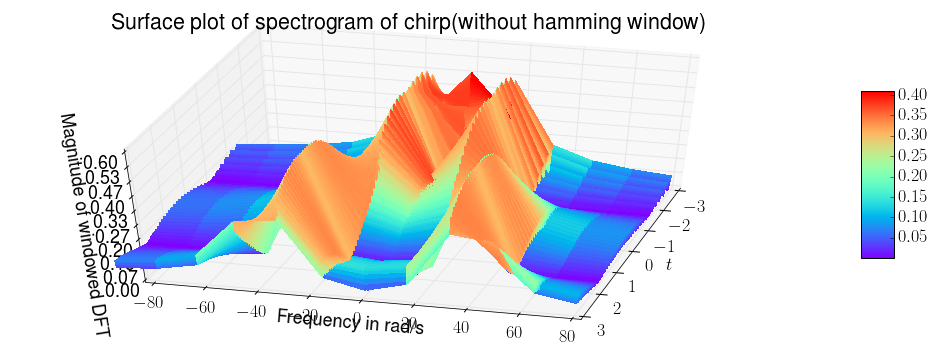

In [29]:
%%writefile_run ee16b033_10.py -a



from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig2 = figure()
ax2 = fig2.gca(projection='3d')
ax2.set_title("Surface plot of spectrogram of chirp(without hamming window)")
#surf = ax2.plot_surface(tt[:,T:-T],ww[:,T:-T],abs(ys.T)[:,T:-T],cmap=cm.rainbow,
#                       linewidth=0, antialiased=False,rstride=1,cstride=1)
surf = ax2.plot_surface(tt,ww,abs(ys.T),cmap=cm.rainbow,
                       linewidth=0, antialiased=False,rstride=1,cstride=1)

ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.set_xlabel("$t$")
ax2.set_ylabel("Frequency in rad/s")
ax2.set_zlabel("Magnitude of windowed DFT")
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_ylim(-80,80)
ax2.view_init(45,15)
    
show()

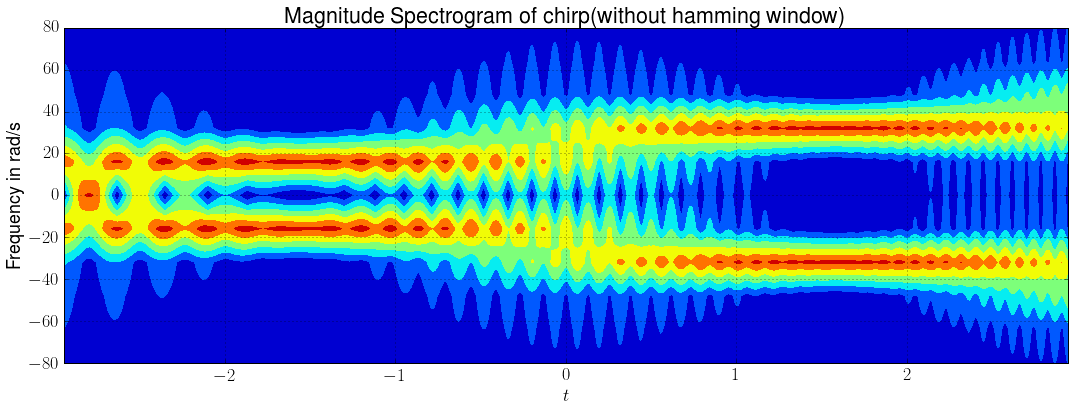

In [30]:
%%writefile_run ee16b033_10.py -a


contourf(tt,ww,abs(ys.T))
grid()
ylim(-80,80)
xlabel("$t$")
ylabel("Frequency in rad/s")
title("Magnitude Spectrogram of chirp(without hamming window)")
show()

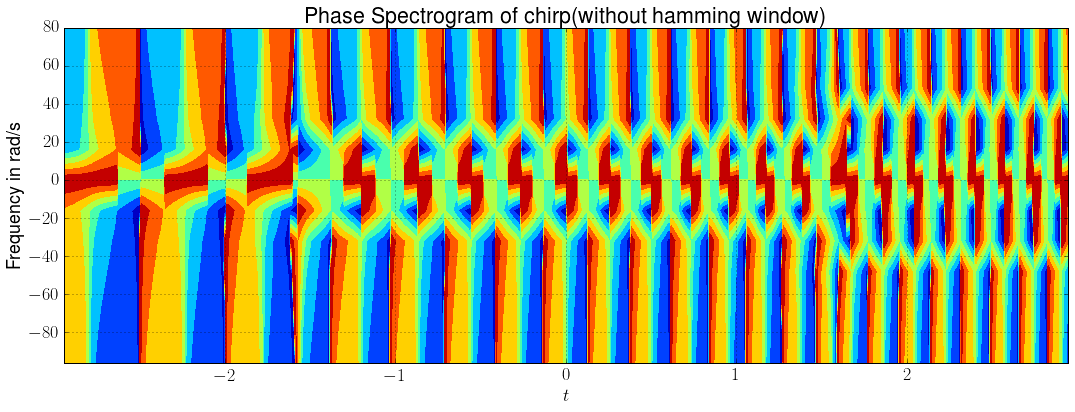

In [31]:
%%writefile_run ee16b033_10.py -a


contourf(tt,ww,angle(ys.T))
grid()
#ylim(-80,80)
xlabel("$t$")
ylabel("Frequency in rad/s")
title("Phase Spectrogram of chirp(without hamming window)")
show()

* We observe that the frequency components with high magnitude are concentrated around a frequency of 16 in the first half of the chirp, and then suddenly move to a frequency of 32 in the second half. We expect only the inital and final frequencies to be 16 and 32 respectively, and not over the whole of the first and second halfs.
* This is because we have not windowed each section before taking the DFT. This results in the component with integer valued frequencies show up with higher amplitudes, and the remaining frequencies decay as $\frac{1}{\omega}$ due to the Gibbs phenomenon.

We repeat the process, but now we use a Hamming window before taking the DFT of each section of 64 samples.

In [32]:
%%writefile_run ee16b033_10.py -a


N = 1024
window = 64
n_wins = int(N/window)
delta_t = 2*pi/N
w_max = pi/delta_t
delta_w = 2*w_max/N
    
t = linspace(-pi,pi,N+1)[:-1]
y = chirp(t)

ys=[]
T=26
for i in arange(0,N-window):
    y_ = y[i:i+window]*fftshift(hamming(arange(window)))
    Y = 1/window * fftshift(fft(y_))
    ys.append(Y[T:-T])
    
t = linspace(-pi,pi,N)[int(window/2):-int(window/2)]
w = linspace(-w_max,w_max,window+1)[:-1][T:-T]
tt,ww = meshgrid(t,w)
ys = array(ys)

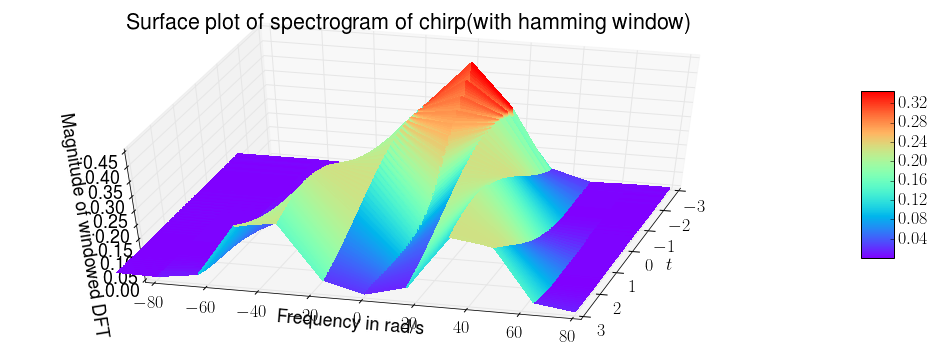

In [33]:
%%writefile_run ee16b033_10.py -a



from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig2 = figure()
ax2 = fig2.gca(projection='3d')
ax2.set_title("Surface plot of spectrogram of chirp(with hamming window)")
#surf = ax2.plot_surface(tt[:,T:-T],ww[:,T:-T],abs(ys.T)[:,T:-T],cmap=cm.rainbow,
#                       linewidth=0, antialiased=False,rstride=1,cstride=1)
surf = ax2.plot_surface(tt,ww,abs(ys.T),cmap=cm.rainbow,
                       linewidth=0, antialiased=False,rstride=1,cstride=1)

ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.set_xlabel("$t$")
ax2.set_ylabel("Frequency in rad/s")
ax2.set_zlabel("Magnitude of windowed DFT")
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_ylim(-80,80)
ax2.view_init(45, 15)
    
show()

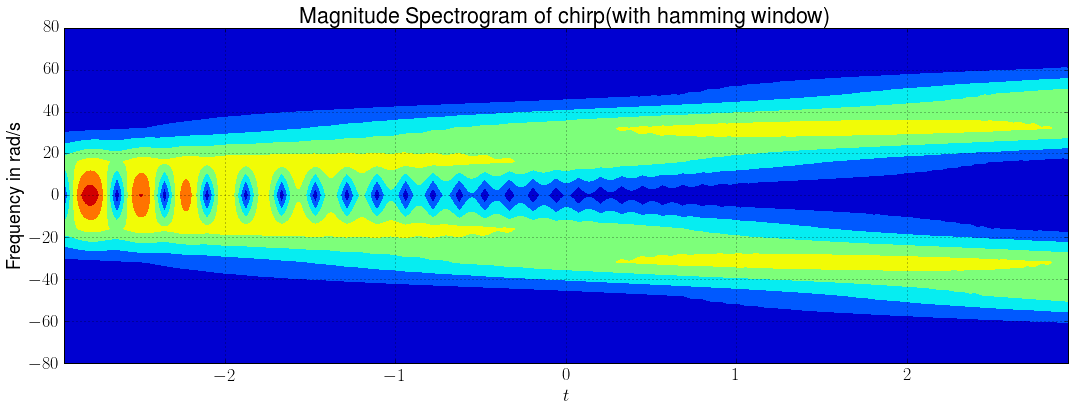

In [34]:
%%writefile_run ee16b033_10.py -a


contourf(tt,ww,abs(ys.T))
grid()
ylim(-80,80)
xlabel("$t$")
ylabel("Frequency in rad/s")
title("Magnitude Spectrogram of chirp(with hamming window)")
show()

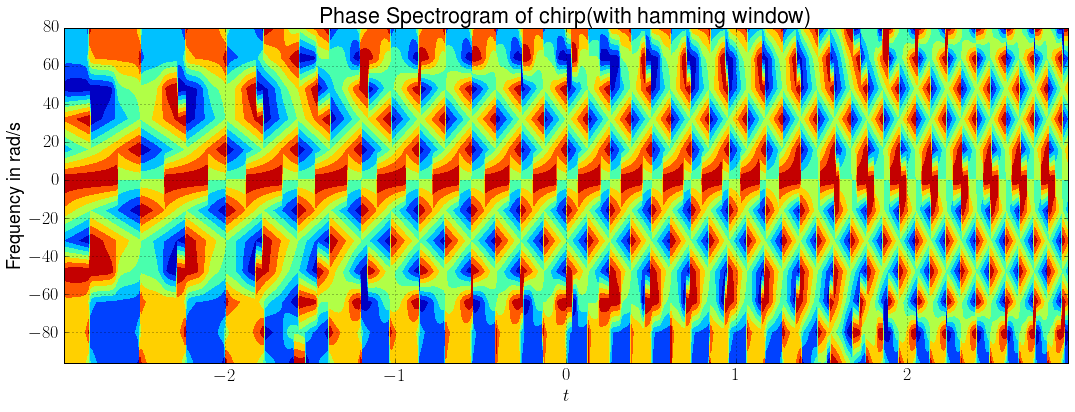

In [35]:
%%writefile_run ee16b033_10.py -a


contourf(tt,ww,angle(ys.T))
grid()
#ylim(-80,80)
xlabel("$t$")
ylabel("Frequency in rad/s")
title("Phase Spectrogram of chirp(with hamming window)")
show()

* We observe a much more gradual change in the frequency in the signal.
* The change is linear from 16 to 32, matching with our expectations.

# Conclusions
* From the above examples, it is clear that using a Hamming window before taking a DFT helps in reducing the effect of Gibbs phenomenon arising due to discontinuities in periodic extensions.
* However, this comes at the cost of spectral leakage. This is basically the blurring of the sharp peaks in the DFT. It occurs because of convolution with the spectrum of the windowing function. Deltas in the original spectrum are smoothed out and replaced by the spectrum of the windowing function.
* We used this windowed DFT to estimate the frequency and phase of an unknown sinusoid from its samples.
* By performing localized DFTs at different time isntants, we obtained a time-frequency plot which allowed us to better analyse signals with varying frequencies in time.